In [1]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
%matplotlib inline

In [4]:
from pandas.io.data import DataReader

In [5]:
from datetime import datetime

In [6]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

In [8]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [9]:
for stock in tech_list:
    globals()[stock] = DataReader(stock, 'yahoo', start, end)

In [10]:
type(AAPL)

pandas.core.frame.DataFrame

In [11]:
AAPL.describe()

,Open,High,Low,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,107.585952,108.668095,106.417222,107.563770,4.761558e+07,106.431890
std,9.893443,9.882245,9.813814,9.845155,2.124304e+07,9.222012
min,90.000000,91.669998,89.470001,90.339996,1.304640e+07,90.339996
25%,97.924999,99.017498,96.757502,97.795000,3.323538e+07,97.509665
50%,108.910004,109.895001,107.334999,108.635002,4.290725e+07,107.434377
75%,115.465003,116.504999,114.012501,115.162501,5.584730e+07,113.335486
max,132.850006,132.970001,130.699997,132.070007,1.622063e+08,129.419998


In [12]:
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2015-07-06 to 2016-07-01
Data columns (total 6 columns):
Open         252 non-null float64
High         252 non-null float64
Low          252 non-null float64
Close        252 non-null float64
Volume       252 non-null int64
Adj Close    252 non-null float64
dtypes: float64(5), int64(1)
memory usage: 13.8 KB


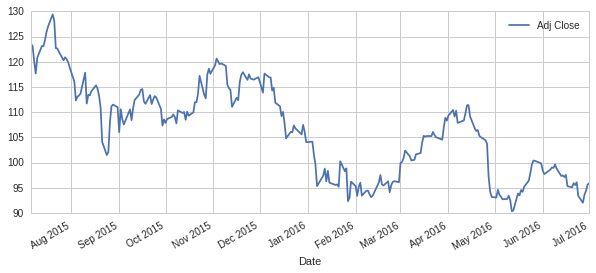

In [15]:
AAPL['Adj Close'].plot(legend=True, figsize=(10,4))

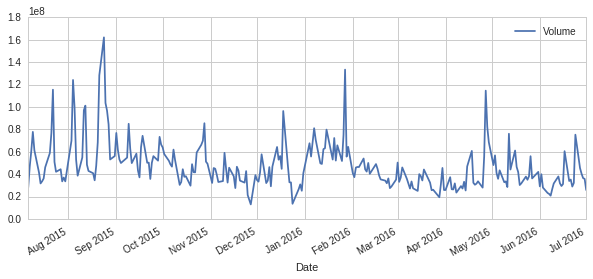

In [16]:
AAPL['Volume'].plot(legend=True, figsize=(10,4))

In [25]:
ma_day = [10, 20, 50]
for ma in ma_day:
    column_name = 'MA {}'.format(ma)
    AAPL[column_name] = pd.rolling_mean(AAPL['Adj Close'], ma)

/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=10).mean()
/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=20).mean()
/home/user/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=50).mean()


In [26]:
AAPL.head(10)

,Open,High,Low,Close,Volume,Adj Close,MA 10,MA 20,MA 50
Date,,,,,,,,,
2015-07-06,124.940002,126.230003,124.849998,126.000000,28060400,123.471786,NaN,NaN,NaN
2015-07-07,125.889999,126.150002,123.769997,125.690002,46946800,123.168009,NaN,NaN,NaN
2015-07-08,124.480003,124.639999,122.540001,122.570000,60761600,120.110610,NaN,NaN,NaN
2015-07-09,123.849998,124.059998,119.220001,120.070000,77821600,117.660773,NaN,NaN,NaN
2015-07-10,121.940002,123.849998,121.209999,123.279999,61354500,120.806362,NaN,NaN,NaN
2015-07-13,125.029999,125.760002,124.320000,125.660004,41440500,123.138612,NaN,NaN,NaN
2015-07-14,126.040001,126.370003,125.040001,125.610001,31768100,123.089612,NaN,NaN,NaN
2015-07-15,125.720001,127.150002,125.580002,126.820000,33649200,124.275333,NaN,NaN,NaN
2015-07-16,127.739998,128.570007,127.349998,128.509995,36222400,125.931417,NaN,NaN,NaN


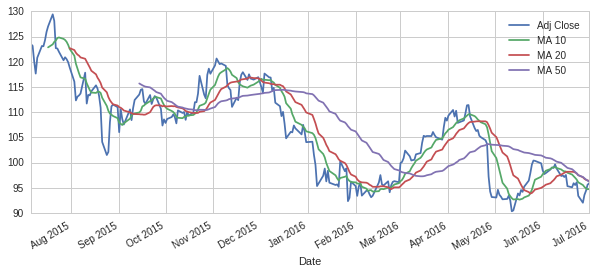

In [27]:
AAPL[['Adj Close', 'MA 10', 'MA 20', 'MA 50']].plot(subplots=False, figsize=(10,4))

In [28]:
AAPL['Daily Return'] = AAPL['Adj Close'].pct_change()

In [29]:
AAPL.head()

,Open,High,Low,Close,Volume,Adj Close,MA 10,MA 20,MA 50,Daily Return
Date,,,,,,,,,,
2015-07-06,124.940002,126.230003,124.849998,126.000000,28060400,123.471786,NaN,NaN,NaN,NaN
2015-07-07,125.889999,126.150002,123.769997,125.690002,46946800,123.168009,NaN,NaN,NaN,-0.002460
2015-07-08,124.480003,124.639999,122.540001,122.570000,60761600,120.110610,NaN,NaN,NaN,-0.024823
2015-07-09,123.849998,124.059998,119.220001,120.070000,77821600,117.660773,NaN,NaN,NaN,-0.020397
2015-07-10,121.940002,123.849998,121.209999,123.279999,61354500,120.806362,NaN,NaN,NaN,0.026734


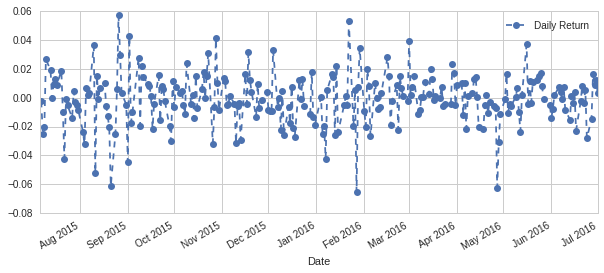

In [30]:
AAPL['Daily Return'].plot(figsize=(10,4), legend=True, linestyle='--', marker='o')

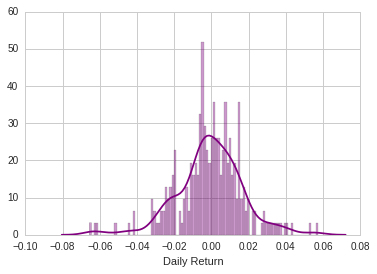

In [32]:
sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

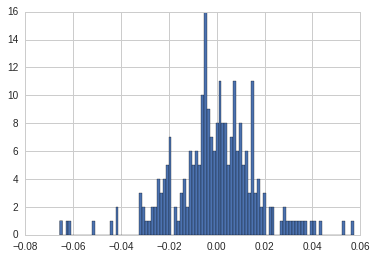

In [33]:
AAPL['Daily Return'].hist(bins=100)

In [34]:
closing_df = DataReader(['AAPL', 'GOOG', 'MSFT', 'AMZN'], 'yahoo', start, end)['Adj Close']

In [35]:
closing_df.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-06,123.471786,436.040009,522.859985,43.189593
2015-07-07,123.168009,436.720001,525.020020,43.102027
2015-07-08,120.110610,429.700012,516.830017,43.043652
2015-07-09,117.660773,434.390015,520.679993,43.316079
2015-07-10,120.806362,443.510010,530.130005,43.403645


In [36]:
tech_rets = closing_df.pct_change()

In [37]:
tech_rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-06,NaN,NaN,NaN,NaN
2015-07-07,-0.002460,0.001559,0.004131,-0.002027
2015-07-08,-0.024823,-0.016074,-0.015599,-0.001354
2015-07-09,-0.020397,0.010915,0.007449,0.006329
2015-07-10,0.026734,0.020995,0.018149,0.002022


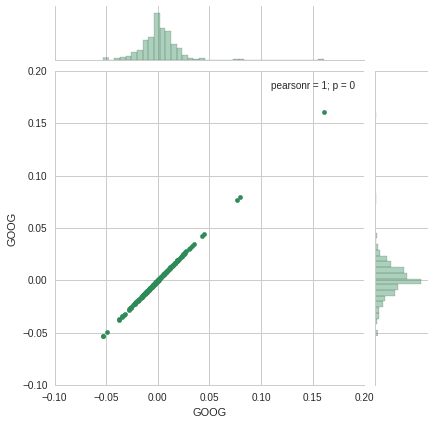

In [39]:
sns.jointplot('GOOG', 'GOOG', tech_rets, kind='scatter', color='seagreen')

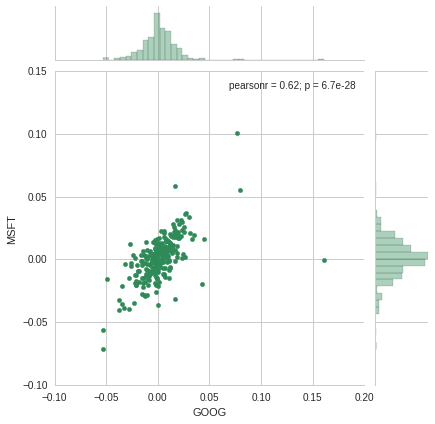

In [40]:
sns.jointplot('GOOG', 'MSFT', tech_rets, kind='scatter', color='seagreen')

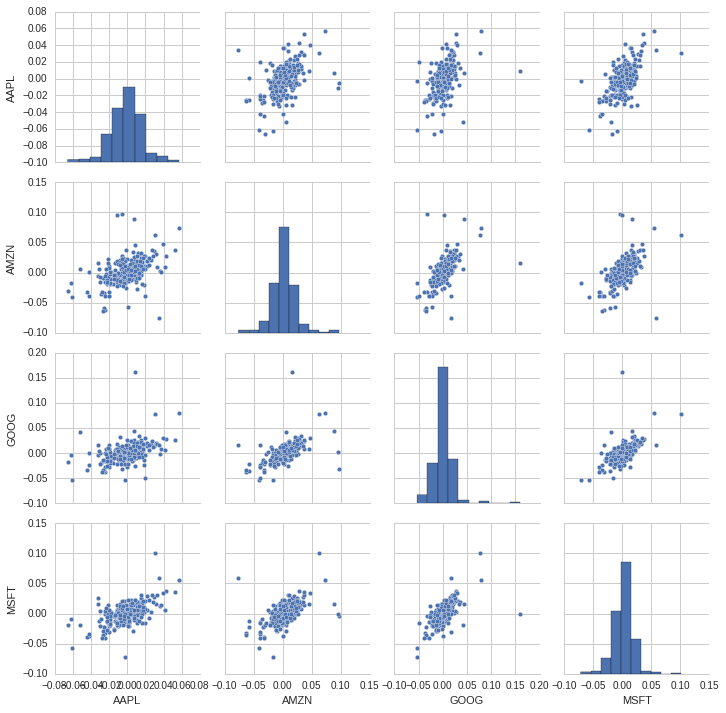

In [41]:
sns.pairplot(tech_rets.dropna())

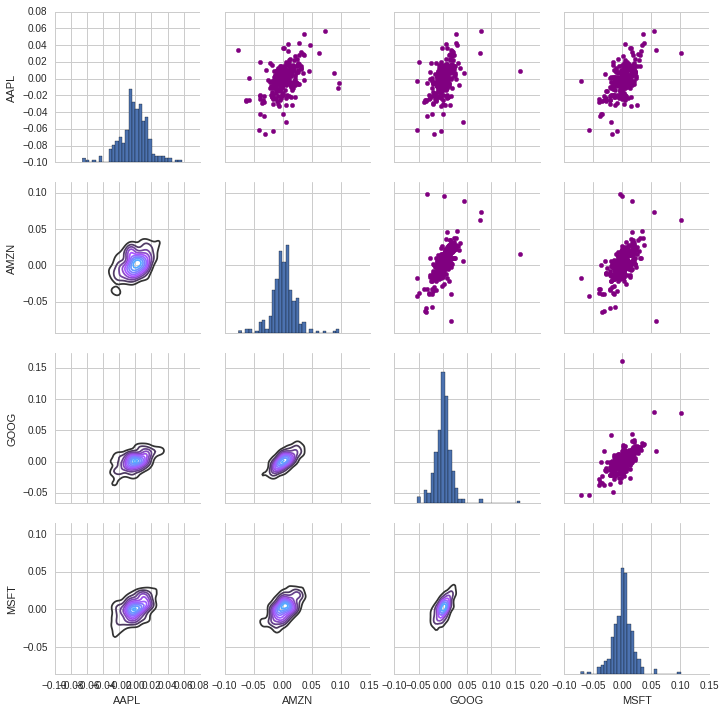

In [42]:
returns_fig  = sns.PairGrid(tech_rets.dropna())
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

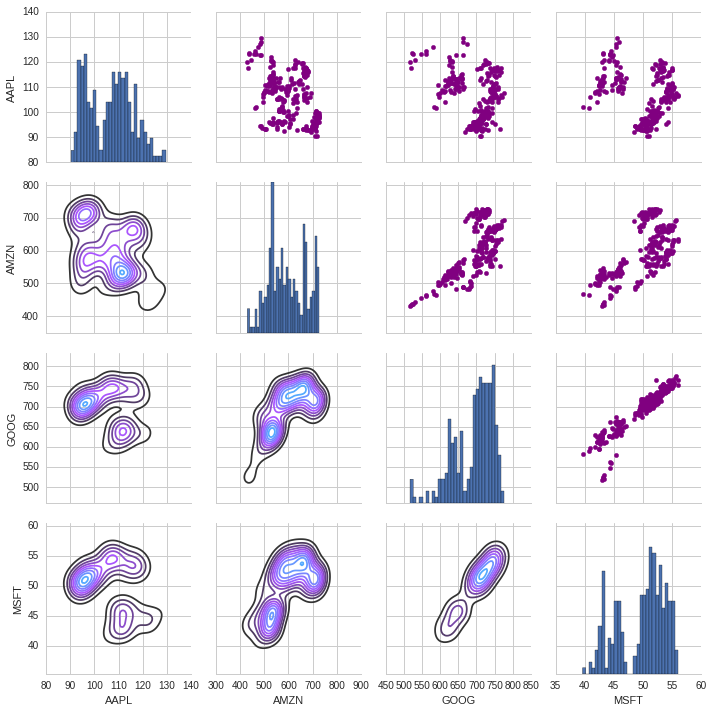

In [43]:
returns_fig  = sns.PairGrid(closing_df)
returns_fig.map_upper(plt.scatter, color='purple')
returns_fig.map_lower(sns.kdeplot, cmap='cool_d')
returns_fig.map_diag(plt.hist, bins=30)

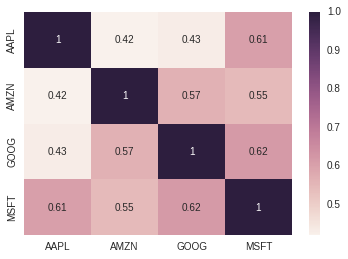

In [44]:
sns.heatmap(tech_rets.corr(), annot=True)

In [45]:
rets = tech_rets.dropna()

In [46]:
rets.head()

,AAPL,AMZN,GOOG,MSFT
Date,,,,
2015-07-07,-0.002460,0.001559,0.004131,-0.002027
2015-07-08,-0.024823,-0.016074,-0.015599,-0.001354
2015-07-09,-0.020397,0.010915,0.007449,0.006329
2015-07-10,0.026734,0.020995,0.018149,0.002022
2015-07-13,0.019306,0.027192,0.030974,0.020847


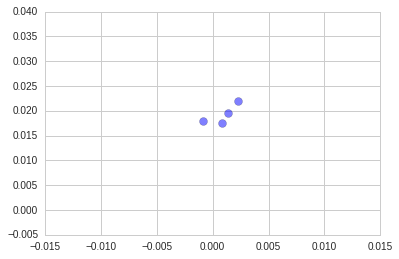

In [47]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)

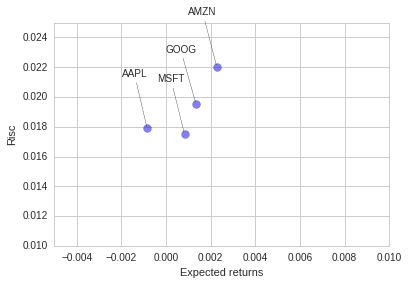

In [54]:
plt.scatter(rets.mean(), rets.std(), alpha=0.5, s=np.pi*20)
plt.ylim([0.01, 0.025])
plt.xlim([-0.005, 0.01])

plt.xlabel('Expected returns')
plt.ylabel('Risc')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x,y), xytext=(0,50),
                textcoords='offset points', ha='right', va='bottom',
                arrowprops=dict(arrowstyle='-', connectionstyle='arc3'))

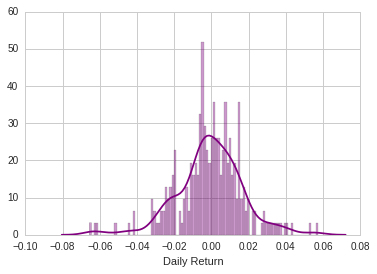

In [55]:
 sns.distplot(AAPL['Daily Return'].dropna(), bins=100, color='purple')

In [56]:
rets['AAPL'].quantile(0.05)

-0.02865208396650748

In [57]:
days = 365
dt = 1/days
mu = rets.mean()['GOOG']
sigma = rets.std()['GOOG']

In [61]:
def stock_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]))
    return price

In [60]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2015-07-06,519.500000,525.250000,519.000000,522.859985,1280500,522.859985
2015-07-07,523.130005,526.179993,515.179993,525.020020,1597200,525.020020
2015-07-08,521.049988,522.734009,516.109985,516.830017,1296700,516.830017
2015-07-09,523.119995,523.770020,520.349976,520.679993,1839400,520.679993
2015-07-10,526.289978,532.559998,525.549988,530.130005,1956700,530.130005


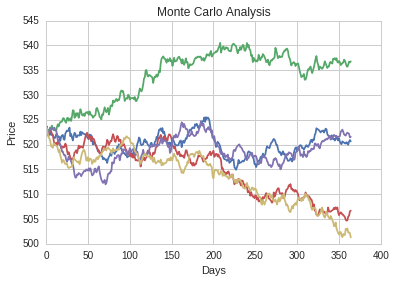

In [62]:
start_price = GOOG.iloc[0,5]

for run in range(5):
    plt.plot(stock_monte_carlo(start_price, days, mu, sigma))
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte Carlo Analysis')

In [70]:
runs = 10000
simulations = np.zeros(runs)
np.set_printoptions(threshold=5)
for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price, days, mu, sigma)[days-1]

(array([ 1.,  0.,  0., ...,  1.,  0.,  1.]),
 array([ 487.2477412 ,  487.61545986,  487.98317852, ...,  560.05603593,
         560.42375459,  560.79147325]),
 <a list of 200 Patch objects>)

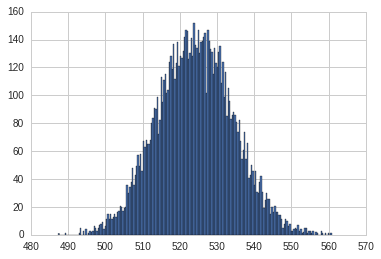

In [71]:
plt.hist(simulations,bins=200)

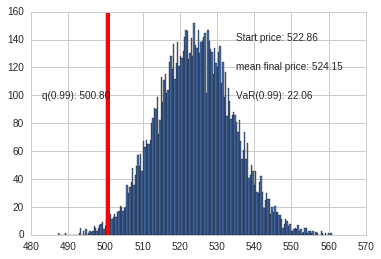

In [74]:
q = np.percentile(simulations, 1)
plt.hist(simulations, bins=200)

plt.figtext(0.6, 0.8, s='Start price: {:0.2f}'.format(start_price))
plt.figtext(0.6, 0.7, 'mean final price: {:0.2f}'.format(simulations.mean()))
plt.figtext(0.6, 0.6, 'VaR(0.99): {:0.2f}'.format(start_price-q))
plt.figtext(0.15, 0.6, 'q(0.99): {:0.2f}'.format(q))

plt.axvline(x = q, linewidth=4, color='r')